In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score

np.random.seed(0)
%matplotlib inline

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

y = np.array([0 if i <= 1 else 1 for i in y])

perm = np.random.permutation(y.size)
x = x[perm][:]
y = y[perm][:]

x = x[:, 2:]
y = y.reshape(-1, 1)

Text(0.5, 1.0, 'sigmoid function')

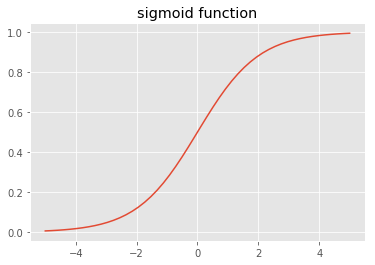

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

plt.style.use('ggplot')
plt.plot(np.linspace(-5, 5), sigmoid(np.linspace(-5, 5)))
plt.title('sigmoid function')

In [4]:
def step(x, y, w, b, lr):
    # forward pass using vectorization
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    
    # gradient calculation using vectorization
    dz = a - y
    dw = np.dot(x, dz.T) * 1/y.size
    db = np.sum(dz) * 1/y.size
    
    # gradient descent update
    w = w - lr*dw
    b = b - lr*db
    
    # compute loss
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    loss = np.mean(-y * np.log(a) - (1-y) * np.log(1-a))
    
    return w, b, loss

initial loss: 2.0906723064536377
final loss: 0.26222507729669153
accuracy score:  0.9387755102040817


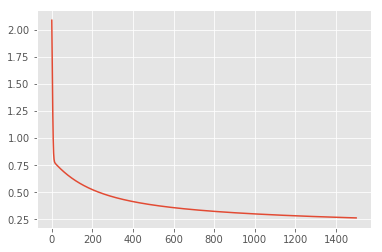

In [5]:
epochs = 1500
lr = 0.05
initial_w = np.random.rand(2, 1)
initial_b = np.random.rand(1, 1)
losses = np.zeros(epochs)

w = initial_w 
b = initial_b
for epoch in range(epochs):
    w, b, losses[epoch] = step(x.T, y.T, w, b, lr)

z = np.dot(w.T, x.T) + b
a = sigmoid(z).reshape(-1)
a = np.array([0 if i <= 0.5 else 1 for i in a])
    
print('initial loss: {}\nfinal loss: {}'.format(losses[0], losses[-1]))
print('accuracy score: ', f1_score(a, y))
plt.plot(np.arange(epochs), losses)
plt.show()